### About Dataset
**Context**
This is the largest retail e-commerce orders dataset from Pakistan. It contains half a million transaction records from March 2016 to August 2018. The data was collected from various e-commerce merchants as part of a research study. I am releasing this dataset as a capstone project for my data science course at Alnafi (alnafi.com/zusmani).
There is a dire need for such dataset to learn about Pakistan’s emerging e-commerce potential and I hope this will help many startups in many ways.

### Content
**Geography:** Pakistan<br>
**Time period:** 03/2016 – 08/2018<br>
**Unit of analysis:** E-Commerce Orders<br>

**Dataset:** The dataset contains detailed information of half a million e-commerce orders in Pakistan from March 2016 to August 2018. It contains item details, shipping method, payment method like credit card, Easy-Paisa, Jazz-Cash, cash-on-delivery, product categories like fashion, mobile, electronics, appliance etc., date of order, SKU, price, quantity, total and customer ID. This is the most detailed dataset about e-commerce in Pakistan that you can find in the Public domain.<br>
**Variables:** The dataset contains Item ID, Order Status (Completed, Cancelled, Refund), Date of Order, SKU, Price, Quantity, Grand Total, Category, Payment Method and Customer ID.<br>
**Size:** 101 MB<br>
**File Type:** CSV<br>

**Objectives to analyze**
I’d like to call the attention of my fellow Kagglers to use Machine Learning and Data Sciences to help me explore these ideas:
•	What is the best-selling category?
•	Visualize payment method and order status frequency
•	Find a correlation between payment method and order status 
•	Find a correlation between order date and item category
•	Find any hidden patterns that are counter-intuitive for a layman
•	Can we predict number of orders, or item category or number of customers/amount in advance?


### <font color = "Green">1. Import Block </font>

In [1]:
# import/ Library block
# importing pandas, Numpy, Matplotlib & Seaborn ...
import numpy as np, pandas as pd

# datatime libraries
import datetime

#Visualization/ graph packages...
import plotly.express as px
import plotly.graph_objs as go
import plotly as py
from plotly import tools
from plotly.offline import iplot
import matplotlib.pyplot as plt, seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
%matplotlib inline

# SkLearn Packages
# importing train_test splitting library function ...
from sklearn.model_selection import train_test_split
#Scaler in Sklearn Library ...
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# importing r2_score, mean-squared method to check accuracy of model ...
from sklearn.metrics import r2_score, mean_squared_error
# Importing RFE and LinearRegression (regression specific)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


# Statsmodel libraries...
from math import sqrt
import statsmodels.api as sm
#from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools  import adfuller
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acovf, acf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor


#Graph Settings
plt.rcParams['figure.figsize'] = (15,4)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 14


#ignore warnings ...
import warnings
warnings.filterwarnings('ignore')

### <font color = "Green">2. Data load and pre-processing</font>

In [3]:
data = pd.read_csv("archive.csv", parse_dates=["created_at", "Working Date"], low_memory=False)
print("Dimenssions of the dataset: ",data.shape)

Dimenssions of the dataset:  (1048575, 26)


In [4]:
data.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  float64       
 1   status                 584509 non-null  object        
 2   created_at             584524 non-null  datetime64[ns]
 3   sku                    584504 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  float64       
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category_name_1        584360 non-null  object        
 9   sales_commission_code  447349 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working Date           584524 non-null  da

As seen above the data set is filled with ample amount of null values and empty columns too thus it becomes necessary to remove these discrepencies otherwise these will create problem in analysis but also need to be carefull before completely discarding a certain attribute or even a single value in a row.

In [4]:
# renaming MV column...
data.rename(columns = {' MV ':'MV'}, inplace = True)

# eliminating last cols and empy/ null values...
data = data.iloc[:, :-5]
data = data.dropna(how = 'all')
print(data.shape)
data.head(3)

(584524, 21)


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,2016-07-01,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cod,2016-07-01,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,cod,2016-07-01,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0


In [5]:
data.isnull().sum()

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137175
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
MV                            0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
dtype: int64

In [6]:
# Eliminating the remaining NaN values in the Text columns given above...

print(data.status.mode())
print()
print(data.category_name_1.mode())

0    complete
Name: status, dtype: object

0    Mobiles & Tablets
Name: category_name_1, dtype: object


In [7]:
# replacing NaN with  "complete" in "status"
data["status"].fillna("complete", inplace = True)
print("null values in status attribute = ", data["status"].isnull().sum())

#replacing NaN with "Mobiles & Tablets" in "category_name_1"
data["category_name_1"].fillna("Mobiles & Tablets", inplace = True)
print("null values in category_name_1 attribute = ", data["category_name_1"].isnull().sum())

null values in status attribute =  0
null values in category_name_1 attribute =  0


In [8]:
# Looking out for other missing values...
null_columns = data.columns[data.isnull().any()]
null_counts = data[null_columns].isnull().sum()

for column in null_columns:
    print(f"Column: {column}, Null Count: {null_counts[column]}")

Column: sku, Null Count: 20
Column: sales_commission_code, Null Count: 137175
Column: Customer Since, Null Count: 11
Column: Customer ID, Null Count: 11


So as you can see ablove the remaining null counts which are miniscule and mentioned above which are not something that can be replaced by mode or any other value so as of now lets keep them for time being and handle them later as per scenario.

Next lets fix the data types of the column which are necessary for our analysis.

In [9]:
data['Customer ID'] = data['Customer ID'].astype(str)
data['item_id'] = data['item_id'].astype(str)
data['qty_ordered'] = data['qty_ordered'].astype(int)  
data["Month"] = data["Month"].astype(int)
data["Year"] = data["Year"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  object        
 1   status                 584524 non-null  object        
 2   created_at             584524 non-null  datetime64[ns]
 3   sku                    584504 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  int32         
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category_name_1        584524 non-null  object        
 9   sales_commission_code  447349 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working Date           584524 non-null  date

### <font color = "Green">3. Exploratory Analysis </font>

Mobiles & Tablets


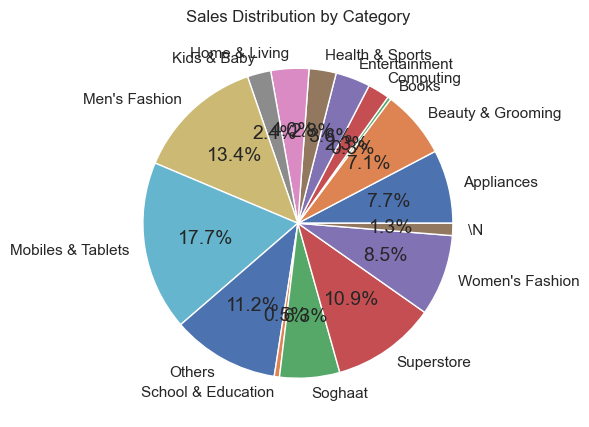

In [10]:
#grouping the product based on categories and finding the sum of total orders...
cat_wise_sales = data.groupby("category_name_1")["qty_ordered"].sum()

#finding the max of the sales category...
print(cat_wise_sales.idxmax())

#visualizing the category distribution of orders using pie plot
plt.figure(figsize=(5, 12))
plt.pie(cat_wise_sales, labels=cat_wise_sales.index, autopct="%1.1f%%")
plt.title("Sales Distribution by Category")
plt.show()


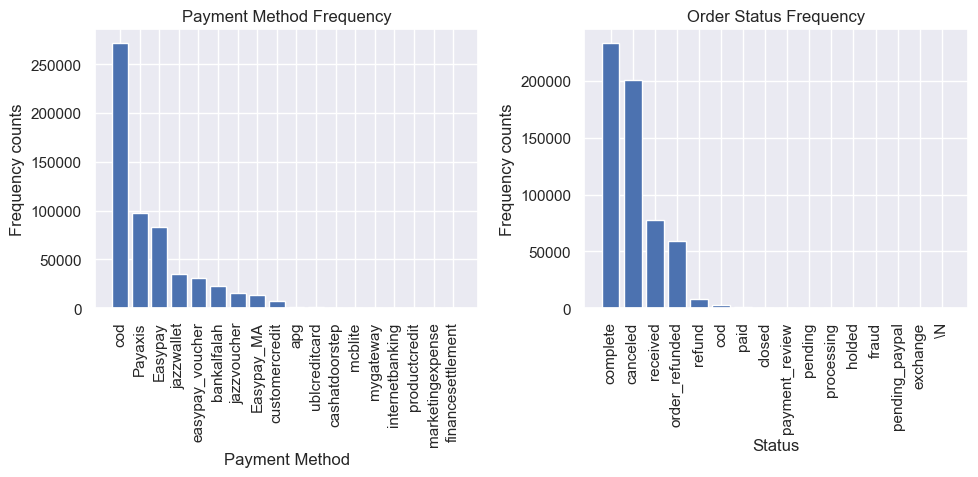

In [11]:
# 
payment_method_counts = data["payment_method"].value_counts()
order_status_counts = data["status"].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot for Payment Method Frequency
axs[0].bar(payment_method_counts.index, payment_method_counts.values)
axs[0].set_xlabel("Payment Method")
axs[0].set_ylabel("Frequency counts")
axs[0].set_title("Payment Method Frequency")
axs[0].tick_params(axis='x', rotation=90)  


# Plot for Order Status Frequency
axs[1].bar(order_status_counts.index, order_status_counts.values)
axs[1].set_xlabel("Status")
axs[1].set_ylabel("Frequency counts")
axs[1].set_title("Order Status Frequency")
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [12]:
# Payment_Order Status_correlation coefficient...
Payment_OrdStatus_corr = pd.crosstab(data['payment_method'], data['status'])

chi2, p_value, dof, expected = chi2_contingency(Payment_OrdStatus_corr)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 208092.8816361259
p-value: 0.0


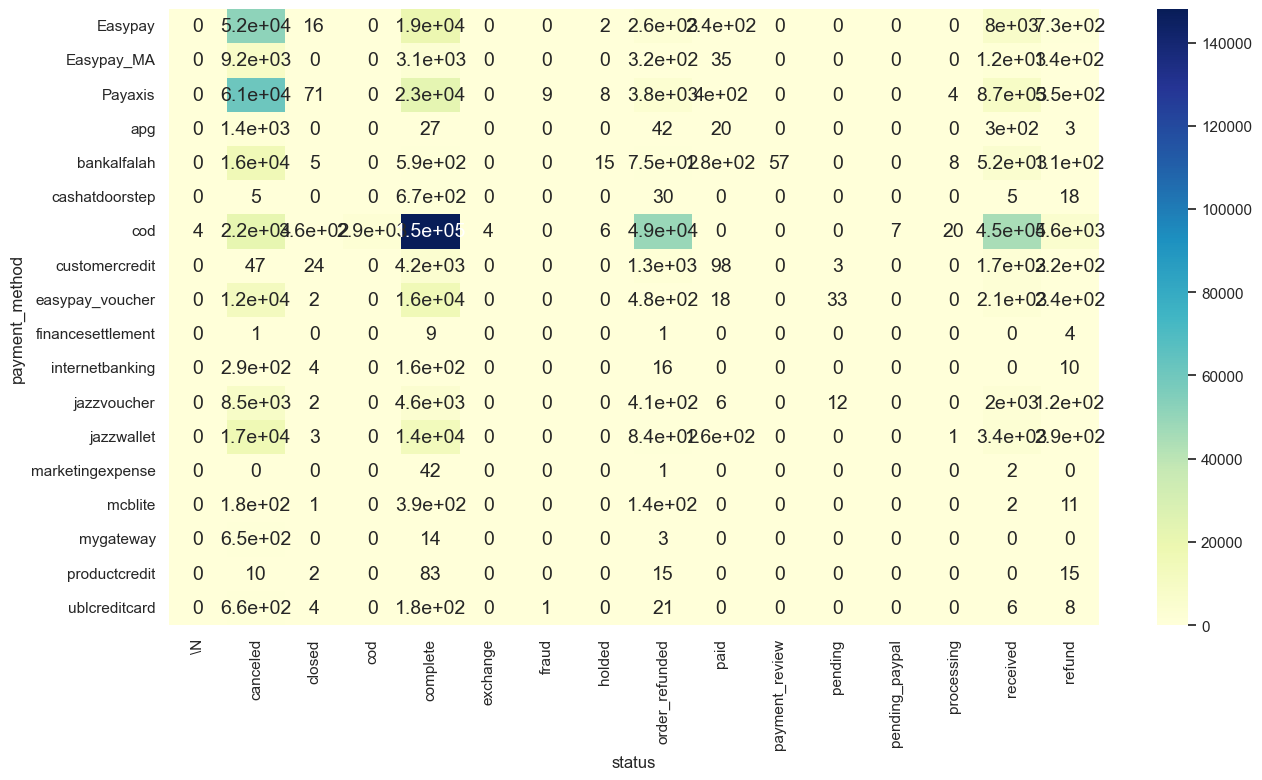

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(Payment_OrdStatus_corr, annot=True, cmap="YlGnBu")
plt.show()

The chi-square statistic obtained is **208092.8816361259**, and the p-value is **0.0**.

- The chi-square statistic indicates the strength of association between the two categorical variables. A higher chi-square value suggests a stronger association.

- The p-value is a measure of the statistical significance of the association. In this case, the p-value is very close to zero (0.0), which suggests that the association between the variables is statistically significant. In other words, it is highly unlikely to observe such an association by chance alone.

- These results indicate that there is a significant association or dependency between the two categorical variables you analyzed.

In [14]:
# Payment_Order Status_correlation coefficient...
OrdDate_Cat_corr = pd.crosstab(data['created_at'], data['category_name_1'])

chi2, p_value, dof, expected = chi2_contingency(OrdDate_Cat_corr)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)


Chi-square statistic: 701341.9940079269
p-value: 0.0


### <font color = "Green"> 4. Further more cleaning of the Data </font>

In [15]:
data.columns[data.isnull().any()]

Index(['sku', 'sales_commission_code', 'Customer Since'], dtype='object')

In [16]:
# removing Null entries of "sales_commission_code"...
value_counts = data['sales_commission_code'].value_counts()
print(value_counts)
print()
print("mode of the sales_commission_code ==",data["sales_commission_code"].mode())

\N                339001
40968               2710
C-LHW-50074         2434
C-RWP-31924         1720
cisb30211           1613
                   ...  
100278139              1
rwp-wah-104124         1
C-FSD-42199            1
Cfsd43702              1
C LHE 45016            1
Name: sales_commission_code, Length: 7226, dtype: int64

mode of the sales_commission_code == 0    \N
Name: sales_commission_code, dtype: object


In [17]:
data["sales_commission_code"].fillna(r"\N", inplace=True)
data= data.dropna()
data.shape

(584493, 21)

this is the final data set which now can be used for modelling and further analyzing to build predictive model as all the missing values and outliers are being delt with accordinglyand the data is homogenous now.

###  <font color = "Green">5. RFM analysis </font>
- R (Recency): Number of days gap since last purchase.
- F (Frequency): Number of tracsactions.
- M (Monetary): Total amount of monetary value generated overall (revenue contributed).

Thus in such scenario the we need to find one of the missing attributes of RFM method from the dataset, so lets go ahead and add it and make the data useful.

#### a. Recency

In [18]:
data["created_at"] = pd.to_datetime(data['created_at'])

max_date = max(data['created_at'])
max_date

Timestamp('2018-08-28 00:00:00')

In [19]:
# computing the difference between last purchase and lst date in dataset
temp_df = data
temp_df['diff'] = max_date - temp_df['created_at']
temp_df.head(3)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,diff
0,211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,\N,...,2016-07-01,#REF!,"1,950",2016,7,2016-7,7-2016,FY17,1.0,788 days
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,\N,...,2016-07-01,Gross,240,2016,7,2016-7,7-2016,FY17,2.0,788 days
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,\N,...,2016-07-01,Gross,"2,450",2016,7,2016-7,7-2016,FY17,3.0,788 days


In [20]:
# recency df creation 
grouped_recn_df = temp_df.groupby('Customer ID')['diff'].min()
grouped_recn_df = grouped_recn_df.reset_index()

print(grouped_recn_df.shape)
print(grouped_recn_df.head())

(115323, 2)
  Customer ID     diff
0         1.0 788 days
1        10.0 788 days
2       100.0 244 days
3      1000.0 776 days
4     10000.0 697 days


#### b. Frequency

In [21]:
freq_df = data[["Customer ID"]]
freq_df["orders"]= range(1, len(freq_df) + 1)

grouped_freq_df = freq_df.groupby('Customer ID')['orders'].count()
grouped_freq_df= grouped_freq_df.reset_index()
grouped_freq_df.columns = ['Customer ID', 'orders']
grouped_freq_df.head()

,Customer ID,orders
0,1.0,1
1,10.0,2
2,100.0,4
3,1000.0,5
4,10000.0,1


#### c. Amount/ Monetary

In [22]:
# monetary 
grouped_amt_df = data.groupby('Customer ID')['grand_total'].sum()
grouped_amt_df = grouped_amt_df.reset_index()
grouped_amt_df.head()

,Customer ID,grand_total
0,1.0,1950.0
1,10.0,732.0
2,100.0,5588.0
3,1000.0,524995.0
4,10000.0,995.0


### merging the dataframes of Recency Frequency and Monetary

In [23]:
# merge the two df's( amount and frequency)...
grouped_df = pd.merge(grouped_amt_df, grouped_freq_df, on='Customer ID', how='inner')

#RFM df...
RFM_df = pd.merge(grouped_recn_df, grouped_df, on='Customer ID', how='inner')

RFM_df.columns = ['Customer ID', 'recency' , 'amount', 'frequency']

RFM_df.head()

,Customer ID,recency,amount,frequency
0,1.0,788 days,1950.0,1
1,10.0,788 days,732.0,2
2,100.0,244 days,5588.0,4
3,1000.0,776 days,524995.0,5
4,10000.0,697 days,995.0,1


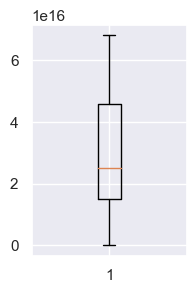

In [24]:
# outlier detection & treatment
plt.figure(figsize=(2,3))
plt.boxplot(RFM_df['recency'])  # add the variable in code to check outliers....( 'recency' / 'amount'/ 'frequency')
plt.show()

In [25]:
rfm = RFM_df[['amount', 'frequency', 'recency']]
print(rfm.info())

# preparing data for scaling...
rfm['recency'] = rfm['recency'].dt.days.astype(int)
RFM_df['amount'] = RFM_df['amount'].astype(int)
print("==========================================================")
print(rfm.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115323 entries, 0 to 115322
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype          
---  ------     --------------   -----          
 0   amount     115323 non-null  float64        
 1   frequency  115323 non-null  int64          
 2   recency    115323 non-null  timedelta64[ns]
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 3.5 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 115323 entries, 0 to 115322
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   amount     115323 non-null  float64
 1   frequency  115323 non-null  int64  
 2   recency    115323 non-null  int32  
dtypes: float64(1), int32(1), int64(1)
memory usage: 3.1 MB
None


### <font color = "Green">6. Scaling the selected features</font>

In [26]:
# Scaling method ...
scaler = StandardScaler()

# fitting & transforming ...
rfm_df_scaled = scaler.fit_transform(rfm)


print(rfm_df_scaled.shape)
print(rfm_df_scaled)

(115323, 3)
[[-0.11041034 -0.17632156  2.09214271]
 [-0.11366753 -0.13298134  2.09214271]
 [-0.10068157 -0.0463009  -0.53449228]
 ...
 [-0.08888296 -0.17632156 -0.96904586]
 [-0.05144402 -0.08964112 -0.96904586]
 [-0.102254   -0.17632156 -0.96904586]]


### <font color = "Green">7. Building a Classification model</font>

The approach we will be following here is K-means clustering for efficient clustering and segmentation of the customer-base to plan fair strategies for product sales and promote growth in company business driven by data analysis conducted in the study.


**Determining the ideal number of clusters to have**

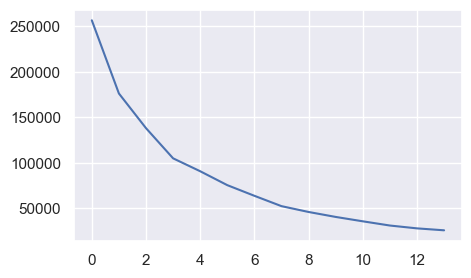

In [27]:
# elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=60)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.figure(figsize=(5, 3))
plt.plot(ssd)
plt.show()


# (0-1-2-3-4-5-6) represents (2,3,4,5,6,7,8) -no of clusters set in the series 

As can be seen clearly the graph drops and almost becomes flat after 8 cluster count, so no point in looking any higher values for clusters which would only increase the computation time of the model and increase the load compromising the time complexity.

validating the appropriate cluster numbers with silhouette score.

In [28]:
# silhouette analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=60)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5685747480694706
For n_clusters=3, the silhouette score is 0.5809116623610923
For n_clusters=4, the silhouette score is 0.5797268771086511
For n_clusters=5, the silhouette score is 0.5887131574145357
For n_clusters=6, the silhouette score is 0.5974015201171173
For n_clusters=7, the silhouette score is 0.5024811047905468
For n_clusters=8, the silhouette score is 0.5097695502625572


So now post testing on both the possible methods Elbow & silhouette analysis we see the optimal cluster number comes to be 2 in both analysis but if we check the results of silhouette analysis model with 6 clusters seem to have the highest score but remember the goal of using kmeans method is to group the customers into various actionable/strategic segments to plan different strategies to ultimately promote the sales so ideally forming just 2 cluster does not makes sense after so much analysis.

Thus as of now 6 seems to be an ideal number here to have for clusters so we will move forward with it and if we feel any better solution can be formed than the existing model we can make the changes in the process.

In [29]:
# final model with k=3
kmeans = KMeans(n_clusters=6, max_iter=60)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=60, n_clusters=6)

In [30]:
kmeans.labels_

array([0, 0, 3, ..., 1, 1, 1])

In [31]:
# assign the label
RFM_df['cluster_id'] = kmeans.labels_
RFM_df.head()

,Customer ID,recency,amount,frequency,cluster_id
0,1.0,788 days,1950,1,0
1,10.0,788 days,732,2,0
2,100.0,244 days,5588,4,3
3,1000.0,776 days,524995,5,0
4,10000.0,697 days,995,1,0


In [32]:
#coverting recency from datetime format to int 32 dtype...
RFM_df['recency'] = RFM_df['recency'].dt.days.astype("int32")


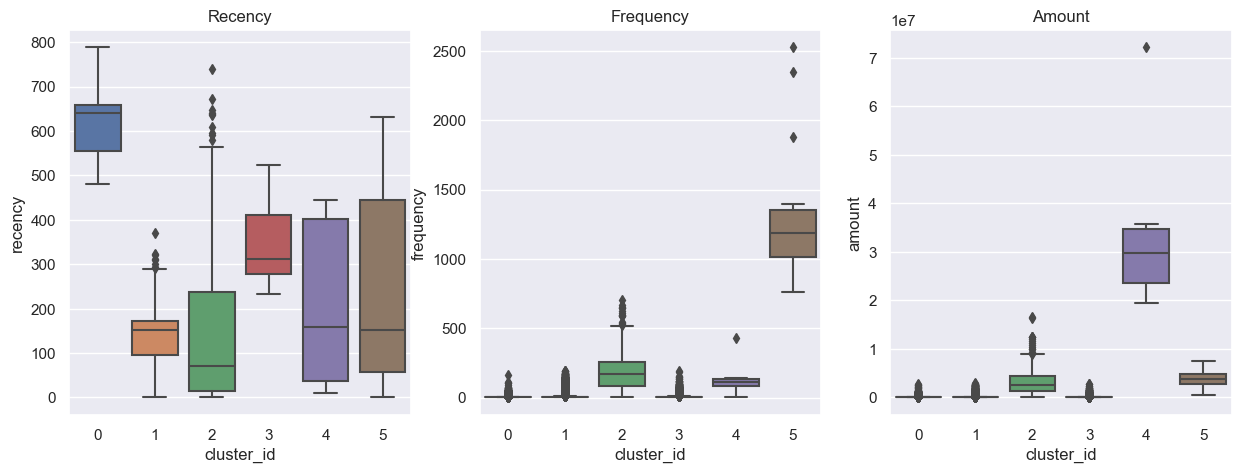

In [33]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

# Generate a boxplot for Recency
sns.boxplot(x='cluster_id', y='recency', data=RFM_df, ax=axs[0])
axs[0].set_title("Recency")

# Generate a boxplot for Frequency
sns.boxplot(x='cluster_id', y='frequency', data=RFM_df, ax=axs[1])
axs[1].set_title("Frequency")

# Generate a boxplot for Monetary
sns.boxplot(x='cluster_id', y='amount', data=RFM_df, ax=axs[2])
axs[2].set_title("Amount")

# Display the plot
plt.show()

## Insights

Using 3 clusters formation we can draw the following insights for an RFM framework in K mean clustering algorithm:<br><br>
. **Recency** - Cluster 0 is the group of customers with very good turnaround time between 2  orders with gap being in range 190 to 300, followed by cluster 2 and 1 respectively.
<br><br>
. **Frequency** - After removing extreme outliers from datasets we can see great change in frequency aspect which tells about how frequent transactions are wherein the cluster-1 seem to have great deal of importance then cluster-2 and cluster-0.
<br><br>
. **Amount** - Most important variable in RFM amount/monetary here we see a trend similar to frequency.with higher number of customers in cluster 1 nd 2, 0 respectively.
<br>

<br>
Hence having 3 clusters with the following set of datapoints, removal of following outliers will lead to ideal grouping /segmentation to develop strategic solutions to promote sales identifying the nature of usersand cater to their needs.

### <font color = "Green">8. Applying ARIMA for predicting furure sales trends</font>


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [34]:
#Importing Packages
!pip install pmdarima
from pmdarima import auto_arima

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584493 entries, 0 to 584523
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   item_id                584493 non-null  object         
 1   status                 584493 non-null  object         
 2   created_at             584493 non-null  datetime64[ns] 
 3   sku                    584493 non-null  object         
 4   price                  584493 non-null  float64        
 5   qty_ordered            584493 non-null  int32          
 6   grand_total            584493 non-null  float64        
 7   increment_id           584493 non-null  object         
 8   category_name_1        584493 non-null  object         
 9   sales_commission_code  584493 non-null  object         
 10  discount_amount        584493 non-null  float64        
 11  payment_method         584493 non-null  object         
 12  Working Date           584493 

In [36]:
data = data.sort_values('created_at')
# Adding New Features
dtg = data.groupby('created_at')['grand_total'].sum().reset_index()
dtq = data.groupby('created_at')['qty_ordered'].sum().reset_index()
dtd = data.groupby('created_at')['discount_amount'].sum().reset_index()
# Compute count for non-numeric values
dts = data.groupby('created_at')['sku'].count().reset_index() 
dtst = data.groupby('created_at')['status'].count().reset_index()
# New data set
p = pd.DataFrame(dtg) 
p['qty_ordered'] = dtq['qty_ordered']
p['discount_amount'] = dtd['discount_amount']
p['sku'] = dts['sku']
p['status'] = dtst['status']
# Cumulative Sum
p['cum_grand_total'] = p['grand_total'].cumsum()
p['cum_qty_ordered'] = p['qty_ordered'].cumsum()
p['cum_discount_amount'] = p['discount_amount'].cumsum()
p['cum_sku_cnt'] = p['sku'].cumsum()
p['cum_status_cnt'] = p['status'].cumsum()
# Date features
p['Dateofmonth'] = p['created_at'].dt.day
p['Month'] = p['created_at'].dt.month
p['Week'] = p['created_at'].dt.week
p['Dayofweek'] = p['created_at'].dt.dayofweek  # 0 = Monday.
p['Weekdayflg'] = (p['Dayofweek'] // 5 != 1).astype(float)
p['Month'] = p['created_at'].dt.month
p['Quarter'] = p['created_at'].dt.quarter
p['Dayofyear'] = p['created_at'].dt.dayofyear


In [37]:
p.head()

,created_at,grand_total,qty_ordered,discount_amount,sku,status,cum_grand_total,cum_qty_ordered,cum_discount_amount,cum_sku_cnt,cum_status_cnt,Dateofmonth,Month,Week,Dayofweek,Weekdayflg,Quarter,Dayofyear
0,2016-07-01,1301026.75,621,8100.0,547,547,1301026.75,621,8100.0,547,547,1,7,26,4,1.0,3,183
1,2016-07-02,1408450.48,301,2502.0,260,260,2709477.23,922,10602.0,807,807,2,7,26,5,0.0,3,184
2,2016-07-03,2215490.88,264,1501.0,210,210,4924968.11,1186,12103.0,1017,1017,3,7,26,6,0.0,3,185
3,2016-07-04,1094080.25,263,4406.0,229,229,6019048.36,1449,16509.0,1246,1246,4,7,27,0,1.0,3,186
4,2016-07-05,913053.50,194,5230.0,168,168,6932101.86,1643,21739.0,1414,1414,5,7,27,1,1.0,3,187


In [38]:
### **Creating a Sub-Dataset for Sales Predictions**

In [39]:
#selecting first two column
p = p.iloc[:, 0:2]  
p.head()

,created_at,grand_total
0,2016-07-01,1301026.75
1,2016-07-02,1408450.48
2,2016-07-03,2215490.88
3,2016-07-04,1094080.25
4,2016-07-05,913053.50


In [40]:
#Converting this column to datetime
p['created_at'] = pd.to_datetime(p['created_at'],format='%Y-%m-%d')

#Accessing any specific date
p.loc[1, 'created_at'].day_name()
#We can also convert dates into days
p['created_at'].dt.day_name()


0        Friday
1      Saturday
2        Sunday
3        Monday
4       Tuesday
         ...   
784      Friday
785    Saturday
786      Sunday
787      Monday
788     Tuesday
Name: created_at, Length: 789, dtype: object

In [41]:
#For Time Series,Date column must be in indexes
p = p.set_index('created_at')
from datetime import datetime
p.head()

,grand_total
created_at,
2016-07-01,1301026.75
2016-07-02,1408450.48
2016-07-03,2215490.88
2016-07-04,1094080.25
2016-07-05,913053.50


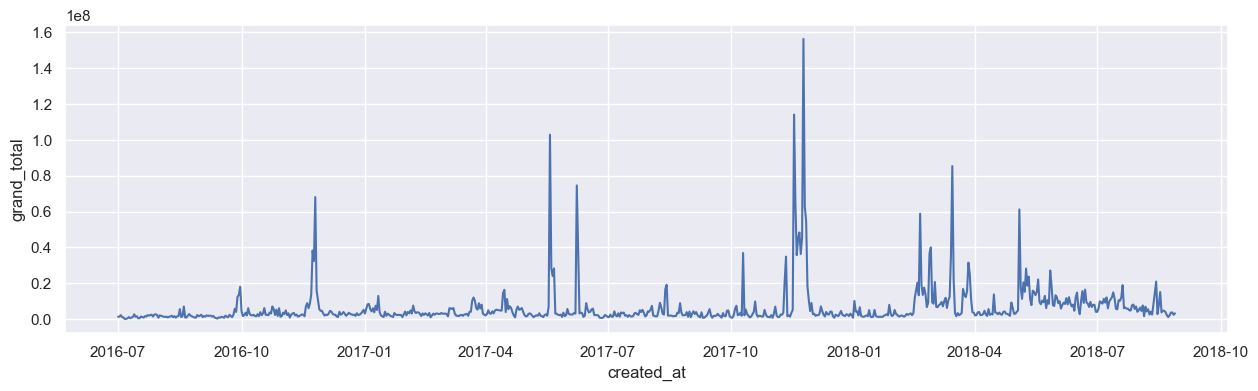

In [42]:
#Plotting graph between year and Total sales
sns.lineplot(x = "created_at" , y = "grand_total",data= p )
plt.show()

In [43]:
#Checking Dataset is stationary or not
results = adfuller(p['grand_total'])
print(results)

(-6.75903980542972, 2.8229241656553846e-09, 7, 781, {'1%': -3.438750669890019, '5%': -2.8652477937238703, '10%': -2.56874438754281}, 26827.93035811952)


#### Here 0th value is (-6.75) which shows test Statistic (More negative it is more stationary dataset will be)
#### Here 1th value is (2.82 e-09) which shows P-value (More negative p-value in data is considered as more stationary)
## Following conditions must be fulfilled for making dataset stationary
1. Test Statistics needed to be below -2.91 
2. Test Statistics has less value than critical value at 5%
3.  P-value is less than 0.5

In [44]:
#We can also print p-value,Test statistics and Critical values as follows
results = adfuller(p['grand_total'])
print('Test Statistics: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values: ')
for key, value in results[4].items():
    print('\t%s: %.3f' % (key,value))

Test Statistics: -6.759040
p-value: 0.000000
Critical Values: 
	1%: -3.439
	5%: -2.865
	10%: -2.569


## As dataset is Stationary but we can improve its stationarity by using following techniques
1. Difference with diff()
2. Log
3. Substracting previous value with Shift()
4. Differencing Simple Moving Average
5. Seasonal Decomposition

In [45]:
#1.Difference with diff()
df_stationary = p.diff().dropna()
result = adfuller(df_stationary)
print(result)

(-9.880511402746263, 3.781047603685345e-17, 18, 769, {'1%': -3.438882201132452, '5%': -2.865305765357574, '10%': -2.568775270215655}, 26830.60096447965)


In [46]:
#2.Log
indexeddataset_logscale = np.log(p['grand_total'])
result = adfuller(indexeddataset_logscale)
print(result)

(-5.880446759286113, 3.0873555742499023e-07, 7, 781, {'1%': -3.438750669890019, '5%': -2.8652477937238703, '10%': -2.56874438754281}, 1449.6064539879135)


In [47]:
#3. Substracting previous value with Shift()
datasetLogDiffShifting = indexeddataset_logscale - indexeddataset_logscale.shift()
datasetLogDiffShifting.dropna(inplace=True)
result = adfuller(datasetLogDiffShifting)
print(result)

(-8.576822153001219, 7.92181736734326e-14, 20, 767, {'1%': -3.4389045244994096, '5%': -2.8653156040031176, '10%': -2.5687805115003}, 1462.6196325047054)


In [48]:
#Differencing Simple Moving Average
movingaverage = indexeddataset_logscale.rolling(window=12).mean()
movingstd = indexeddataset_logscale.rolling(window=12).std()
datasetlogscaleminusmovingaverage = indexeddataset_logscale - movingaverage
datasetlogscaleminusmovingaverage.dropna(inplace=True)
result = adfuller(datasetlogscaleminusmovingaverage)
print(result)

(-10.697837937563511, 3.5864928666350223e-19, 9, 768, {'1%': -3.4388933482333464, '5%': -2.8653106782623574, '10%': -2.5687778874376086}, 1314.9806909535287)


## Differencing Simple Moving Average Provides us most suitable P-value and Test statistics

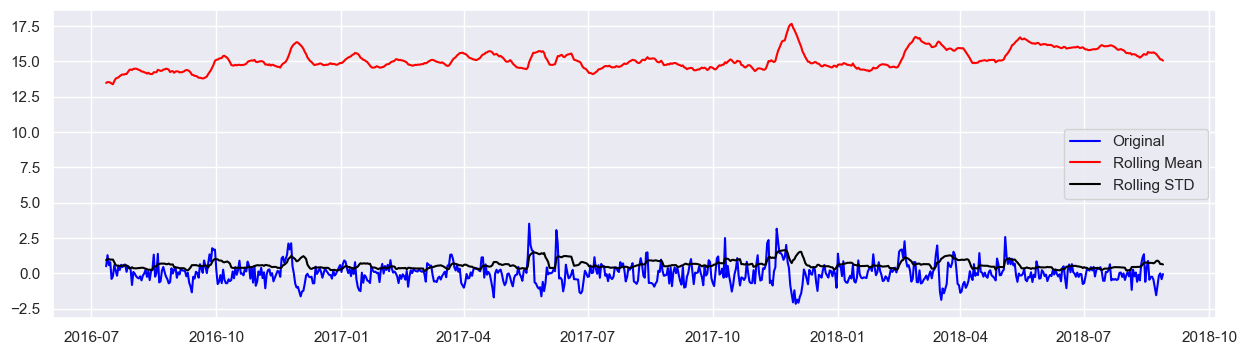

In [49]:
plot = plt.plot(datasetlogscaleminusmovingaverage,color='blue',label='Original')
mean = plt.plot(movingaverage, color='red',label='Rolling Mean')
std = plt.plot(movingstd, color='Black',label='Rolling STD')
plt.legend(loc='best')
#plt.title()
plt.show(block=True)

## 5.Seasonal Decomposition
##### By using this,we can find Seasonality,trends and residuals.

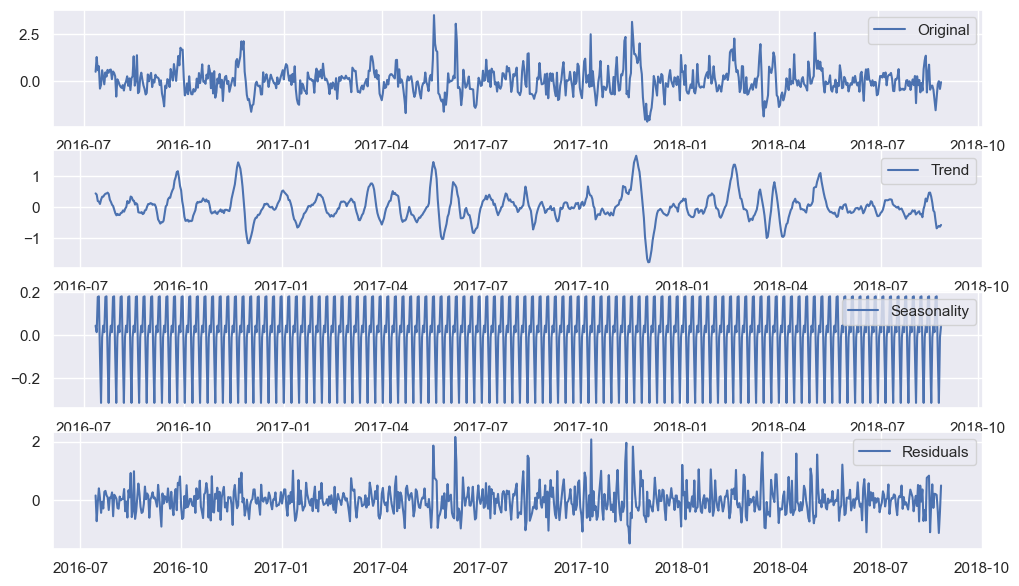

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(datasetlogscaleminusmovingaverage)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(12,7))
plt.subplot(411)
plt.plot(datasetlogscaleminusmovingaverage, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')

In [51]:
datasetlogscaleminusmovingaverage.head()

created_at
2016-07-12    0.492259
2016-07-13    1.277309
2016-07-14    0.575696
2016-07-15    0.784320
2016-07-16   -0.402845
Name: grand_total, dtype: float64

In [52]:
type(datasetlogscaleminusmovingaverage)

pandas.core.series.Series

In [53]:
#Converting above from Series to dataframe
datasetlogscaleminusmovingaverage = pd.Series(datasetlogscaleminusmovingaverage)
new_dataset = datasetlogscaleminusmovingaverage.to_frame()

# Applying ARIMA Model(Auto Regression)

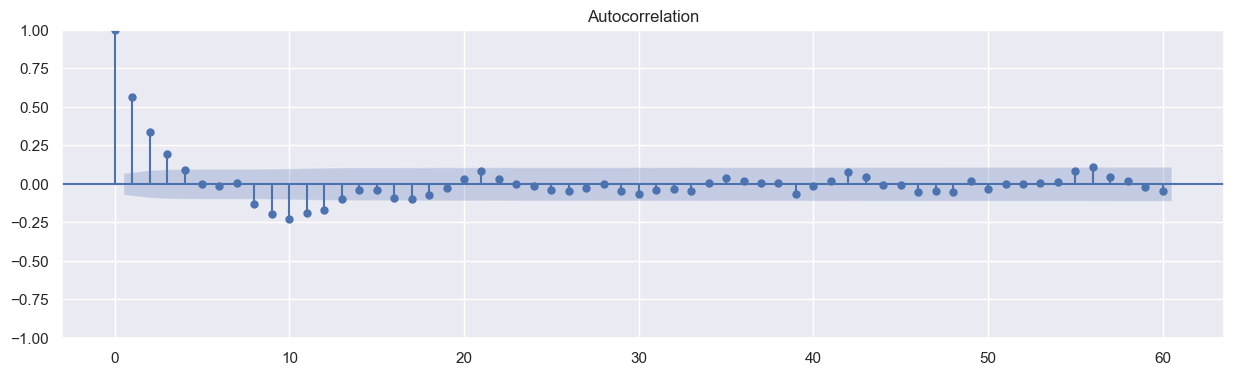

In [54]:
#Autocorrelation
ecom_df = new_dataset
acf(ecom_df, fft=False)
sm.graphics.tsa.plot_acf(ecom_df.values.squeeze(), lags=60);

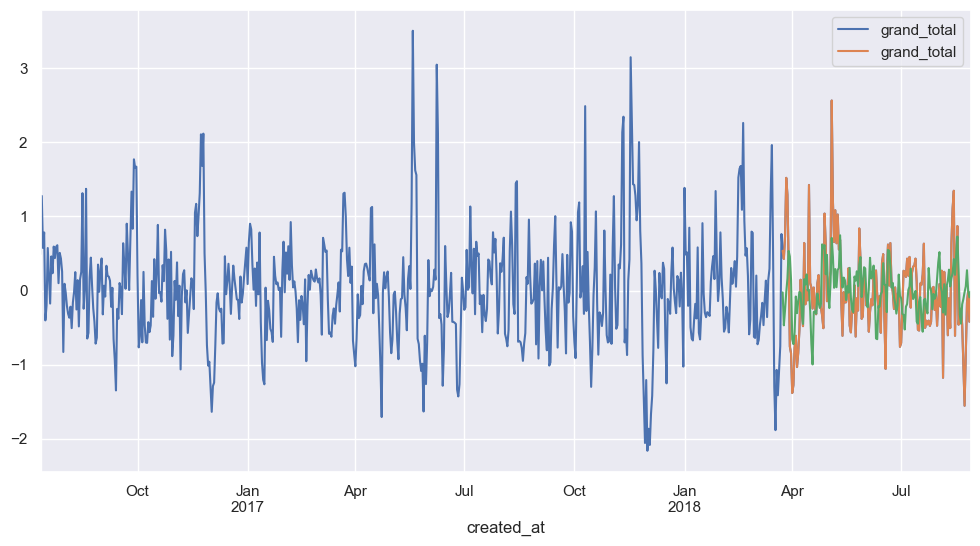

In [55]:
# Change frequency to day
ecom_df = new_dataset.asfreq('d')

# Set style for seaborn plot
sns.set_style('darkgrid')

# Add automatic datetime converters
pd.plotting.register_matplotlib_converters()

# Default figure size
sns.mpl.rc('figure',figsize=(12, 6))

# Plot daily max temps
fig, ax = plt.subplots()
ax = ecom_df.plot(ax=ax)

# Creating model 
model = AutoReg(ecom_df['grand_total'],30)
model_fit = model.fit()

# Define training and testing area
len(ecom_df) # 778 observations
train_df = ecom_df.iloc[:620] 
test_df = ecom_df.iloc[620:] 

# Define training model for 159 days 
train_model = AutoReg(ecom_df['grand_total'], 159).fit(cov_type="HC0")

# Define start and end for prediction 
start = len(train_df)
end = len(train_df) + len(test_df) - 1
prediction = train_model.predict(start=start, end=end, dynamic=True)
# Plot testing data with prediction
ax = test_df.plot(ax=ax) # Orange
ax = prediction.plot(ax=ax) # Green

# Predicting Sales on Daily Time frame

<AxesSubplot:xlabel='created_at'>

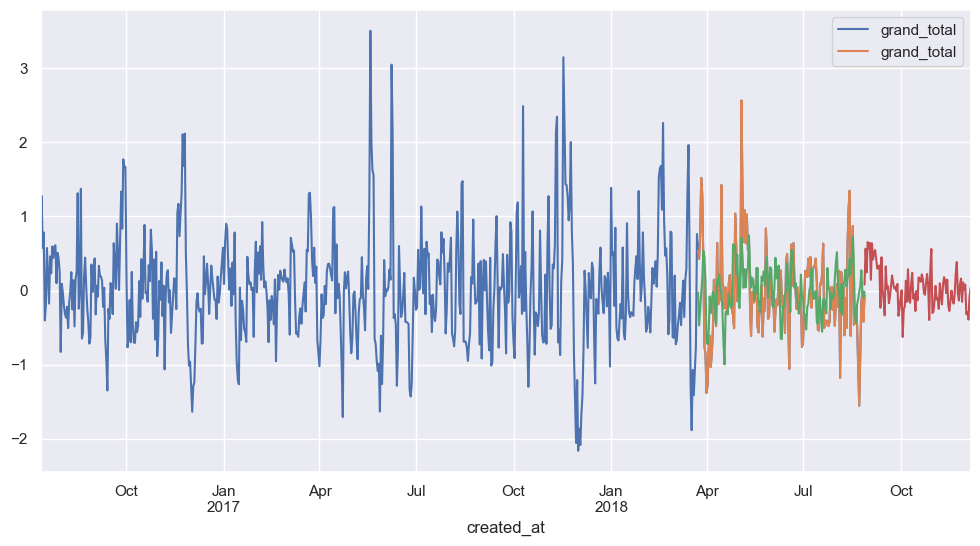

In [56]:
sns.mpl.rc('figure',figsize=(12, 6))
fig, ax = plt.subplots()
ax = ecom_df.plot(ax=ax)
model = AutoReg(ecom_df['grand_total'], 30)
model_fit = model.fit()
len(ecom_df) # 778 observations
train_df = ecom_df.iloc[:620] # 80%
test_df = ecom_df.iloc[620:] # Last 20%
# Define training model for 159 days 
train_model = AutoReg(ecom_df['grand_total'], 159).fit(cov_type="HC0")
start = len(train_df)
end = len(train_df) + len(test_df) - 1
prediction = train_model.predict(start=start, end=end, dynamic=True)
ax = test_df.plot(ax=ax) 
ax = prediction.plot(ax=ax) 

# Predict 100 days into the future
forecast = train_model.predict(start=end, end=end+100, dynamic=True)
forecast.plot(ax=ax) 

**In Above Graph, Different line Colours are used**
1. Red line shows predictions
2. Green Line shows training part of Dataset
3. Orange Line shows Test part of Dataset

In [57]:
mean_absolute_error(test_df, prediction)

0.4340195628655157

In [58]:
ecom_df = new_dataset.asfreq('m')
ecom_df.head()

,grand_total
created_at,
2016-07-31,-0.829195
2016-08-31,0.264442
2016-09-30,1.672717
2016-10-31,-0.607812
2016-11-30,-0.960756


In [59]:
# Predicting Sales on Monthly Time frame

<AxesSubplot:xlabel='created_at'>

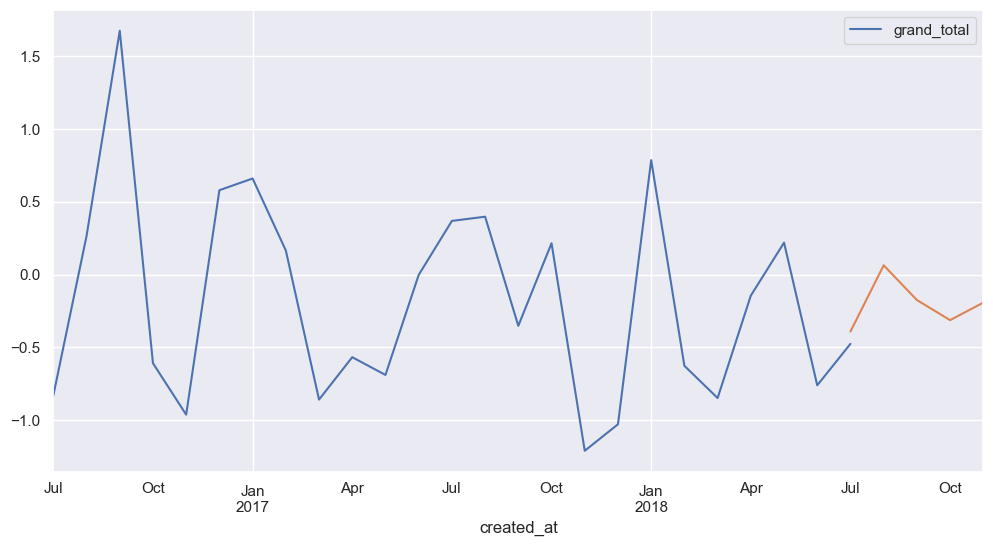

In [60]:
# Set style for seaborn plot
sns.set_style('darkgrid')

# Add automatic datetime converters
pd.plotting.register_matplotlib_converters()

# Default figure size
sns.mpl.rc('figure',figsize=(12, 6))

# Plot monthly max temps
fig, ax = plt.subplots()
ax = ecom_df.plot(ax=ax)

# Creating model 
model = AutoReg(ecom_df['grand_total'],10)
model_fit = model.fit()

# Define training and testing area
len(ecom_df) # 25 observations
train_df = ecom_df.iloc[:16] 
test_df = ecom_df.iloc[16:] 

# Define training model for 5 days 
train_model = AutoReg(ecom_df['grand_total'], 5).fit(cov_type="HC0")

# Define start and end for prediction 
start = len(train_df)
end = len(train_df) + len(test_df) - 1
prediction = train_model.predict(start=start, end=end, dynamic=True)

# Predict 4 months into the future
forecast = train_model.predict(start=end, end=end+4, dynamic=True)
forecast.plot(ax=ax)

In [61]:
mean_absolute_error(test_df, prediction)

0.57113410026802

# Applying SARIMAX Model

In [62]:
new_dataset = datasetlogscaleminusmovingaverage.to_frame()
ecom_df = new_dataset.asfreq('d')
ecom_df.head()

,grand_total
created_at,
2016-07-12,0.492259
2016-07-13,1.277309
2016-07-14,0.575696
2016-07-15,0.784320
2016-07-16,-0.402845


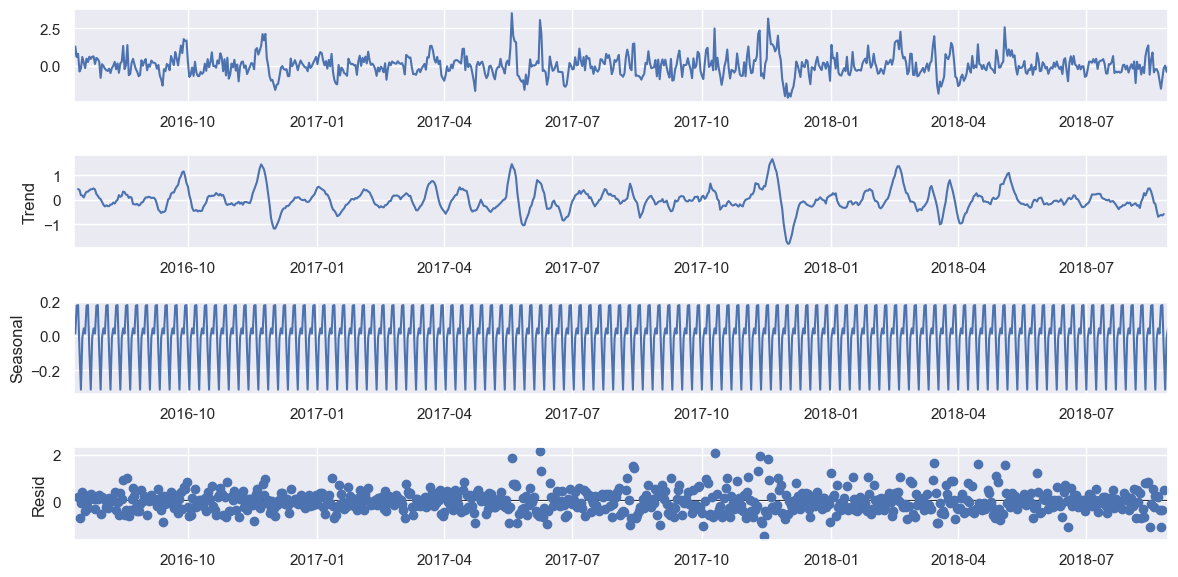

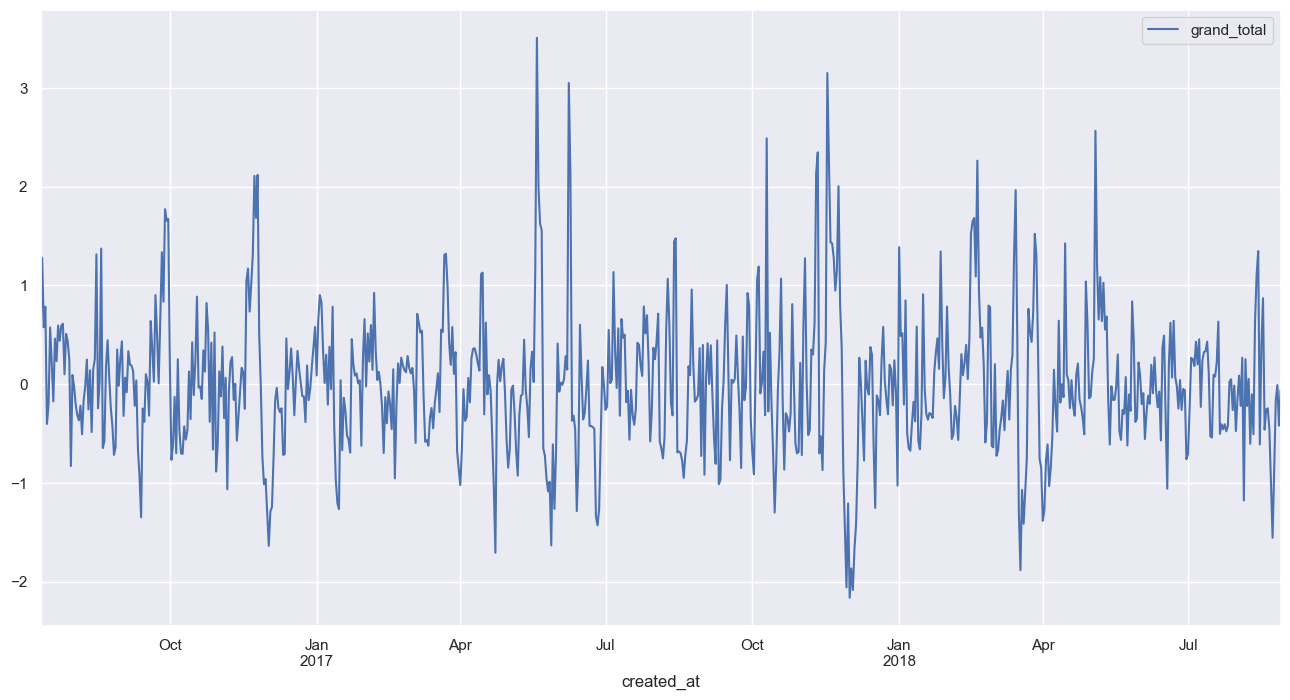

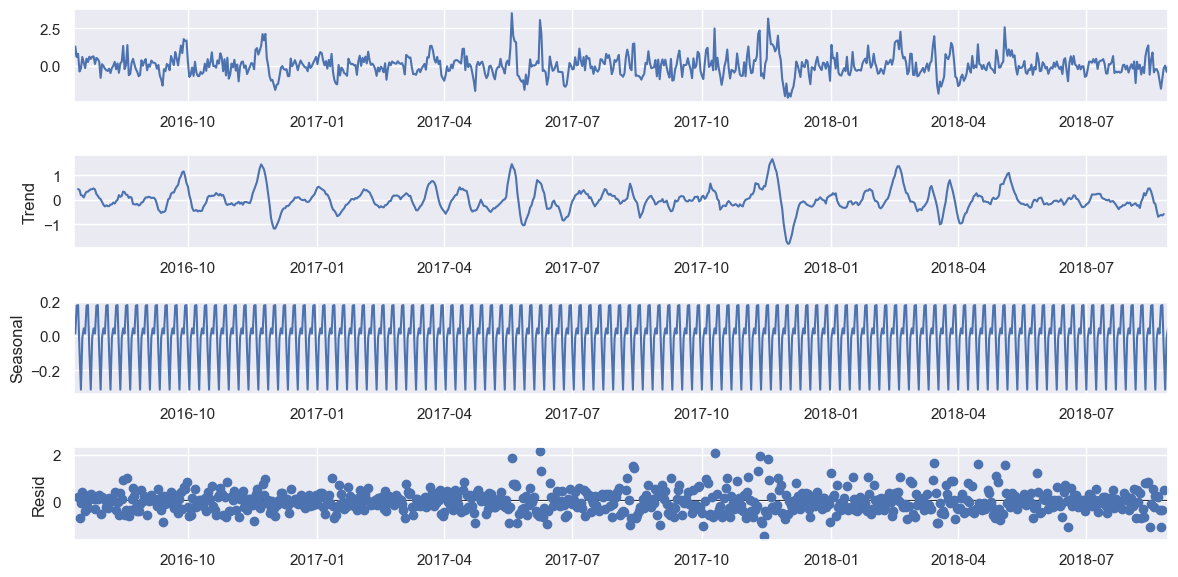

In [63]:
ecom_df.plot(figsize=(16,8))
# We verify that there is a seasonal component
res = seasonal_decompose(ecom_df, model='add')
res.plot()

In [64]:
#Auto Arima
auto_arima(ecom_df, seasonal=True, m=12, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1378.070, Time=5.59 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1672.209, Time=0.27 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1375.473, Time=0.42 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1443.339, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1670.409, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1380.748, Time=0.11 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1377.470, Time=1.39 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1377.470, Time=0.70 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1375.504, Time=0.39 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=1379.469, Time=1.57 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1650.339, Time=0.23 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1377.014, Time=0.51 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=1377.038, Time=0.61 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1443.717, Time=0.34 sec
 ARIMA(2,0,1)(1,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  778
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -683.777
Date:                            Thu, 15 Jun 2023   AIC                           1373.554
Time:                                    20:49:15   BIC                           1387.525
Sample:                                07-12-2016   HQIC                          1378.928
                                     - 08-28-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5510      0.024     22.799      0.000       0.504       0.598
ar.S.L12      -0.0974      0.037     -2.639      0.008      -0.170      -0.025
sigma2         0.3393      0.011     30.483      0.000       0.318       0.361
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):               330.16
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                             0.70
Prob(H) (two-sided):                  0.06   Kurtosis:                         5.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

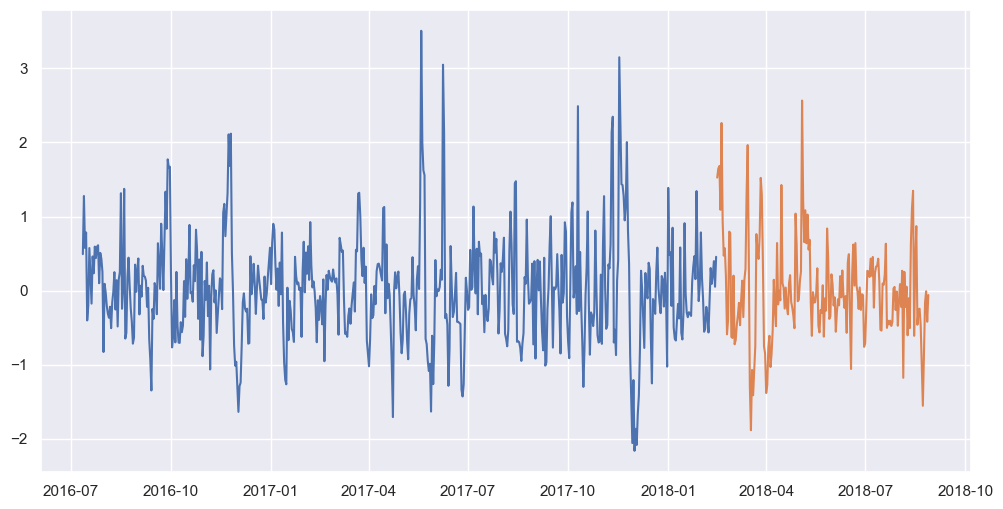

In [65]:
train_df = ecom_df.iloc[:583] # 80%
test_df = ecom_df.iloc[583:] # 20%
model = SARIMAX(train_df, order=(0, 1, 3),
               seasonal_order=(1, 0, 1, 12))
res = model.fit()
start = len(train_df)
end = len(train_df) + len(test_df) - 1
forecast = res.predict(start, end )
forecast = pd.DataFrame(forecast,index = test_df.index,columns=['Prediction'])
plt.plot(train_df, label='Train')
plt.plot(test_df, label='Test')
plt.plot(forecast, label='Prediction')
plt.show()

<AxesSubplot:xlabel='created_at'>

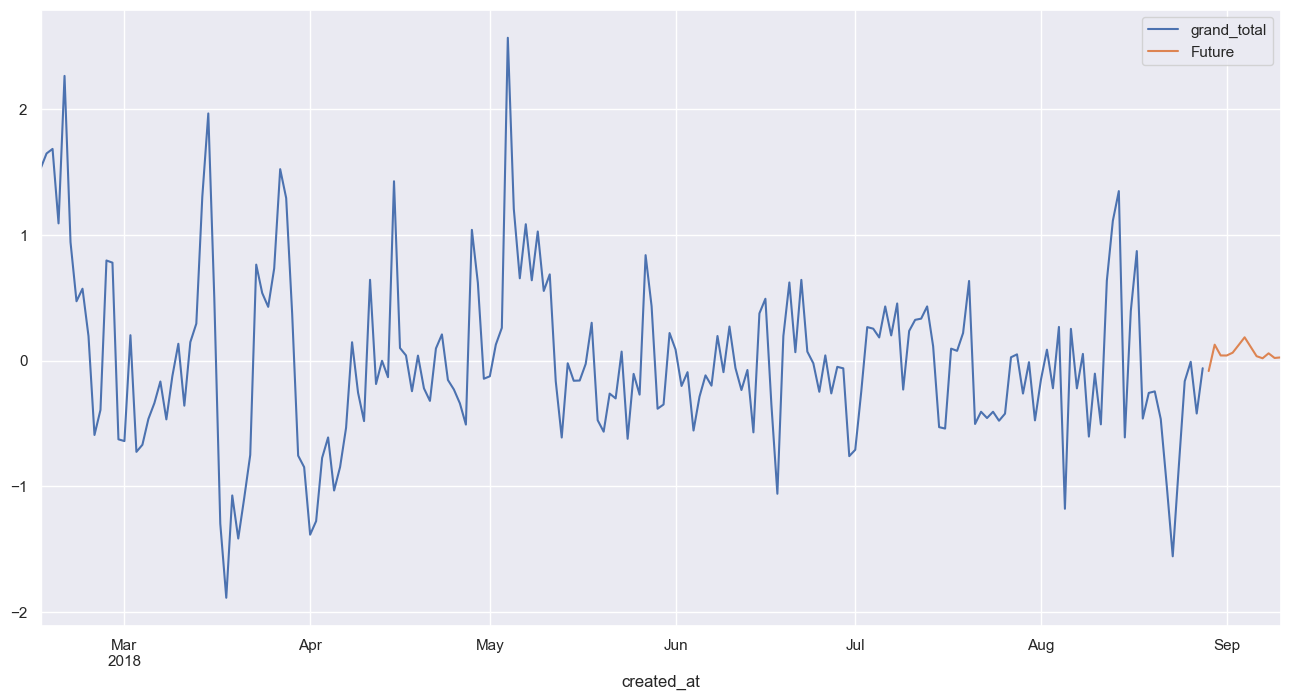

In [66]:
# Predict the future
model = SARIMAX(ecom_df, order=(0, 1, 3),
               seasonal_order=(1, 0, 1, 12))
res = model.fit()
future = res.predict(len(ecom_df), len(ecom_df)+12, 
                    typ='levels').rename('Future')
test_df.plot(legend=True, figsize=(16,8))
future.plot(legend=True)

### This model works slightly better than Above model

In [67]:
data = data.sort_values('created_at')
# Adding New Features
dtg = data.groupby('created_at')['grand_total'].sum().reset_index()
dtq = data.groupby('created_at')['qty_ordered'].sum().reset_index()
dtd = data.groupby('created_at')['discount_amount'].sum().reset_index()
# Compute count for non-numeric values
dts = data.groupby('created_at')['sku'].count().reset_index() 
dtst = data.groupby('created_at')['status'].count().reset_index()
# New data set
p = pd.DataFrame(dtg) 
p['qty_ordered'] = dtq['qty_ordered']
p['discount_amount'] = dtd['discount_amount']
p['sku'] = dts['sku']
p['status'] = dtst['status']
# Cumulative Sum
p['cum_grand_total'] = p['grand_total'].cumsum()
p['cum_qty_ordered'] = p['qty_ordered'].cumsum()
p['cum_discount_amount'] = p['discount_amount'].cumsum()
p['cum_sku_cnt'] = p['sku'].cumsum()
p['cum_status_cnt'] = p['status'].cumsum()
# Date features
p['Dateofmonth'] = p['created_at'].dt.day
p['Month'] = p['created_at'].dt.month
p['Week'] = p['created_at'].dt.week
p['Dayofweek'] = p['created_at'].dt.dayofweek  # 0 = Monday.
p['Weekdayflg'] = (p['Dayofweek'] // 5 != 1).astype(float)
p['Month'] = p['created_at'].dt.month
p['Quarter'] = p['created_at'].dt.quarter
p['Dayofyear'] = p['created_at'].dt.dayofyear


In [68]:
trend_df = p.iloc[:, 0:2]  
trend_df.head()

,created_at,grand_total
0,2016-07-01,1301026.75
1,2016-07-02,1408450.48
2,2016-07-03,2215490.88
3,2016-07-04,1094080.25
4,2016-07-05,913053.50


In [69]:
#Creating another column
trend_df['Year_month'] = p['created_at'].apply(lambda x: x.strftime('%Y-%m'))
trend_df.head()

,created_at,grand_total,Year_month
0,2016-07-01,1301026.75,2016-07
1,2016-07-02,1408450.48,2016-07
2,2016-07-03,2215490.88,2016-07
3,2016-07-04,1094080.25,2016-07
4,2016-07-05,913053.50,2016-07


In [70]:
#Creating another column
trend_df['Year_month'] = trend_df['created_at'].apply(lambda x: x.strftime('%Y-%m'))
trend_df.head()

,created_at,grand_total,Year_month
0,2016-07-01,1301026.75,2016-07
1,2016-07-02,1408450.48,2016-07
2,2016-07-03,2215490.88,2016-07
3,2016-07-04,1094080.25,2016-07
4,2016-07-05,913053.50,2016-07


In [71]:
#Grouping Month Year
trend_df = trend_df.groupby('Year_month').sum()['grand_total'].reset_index()

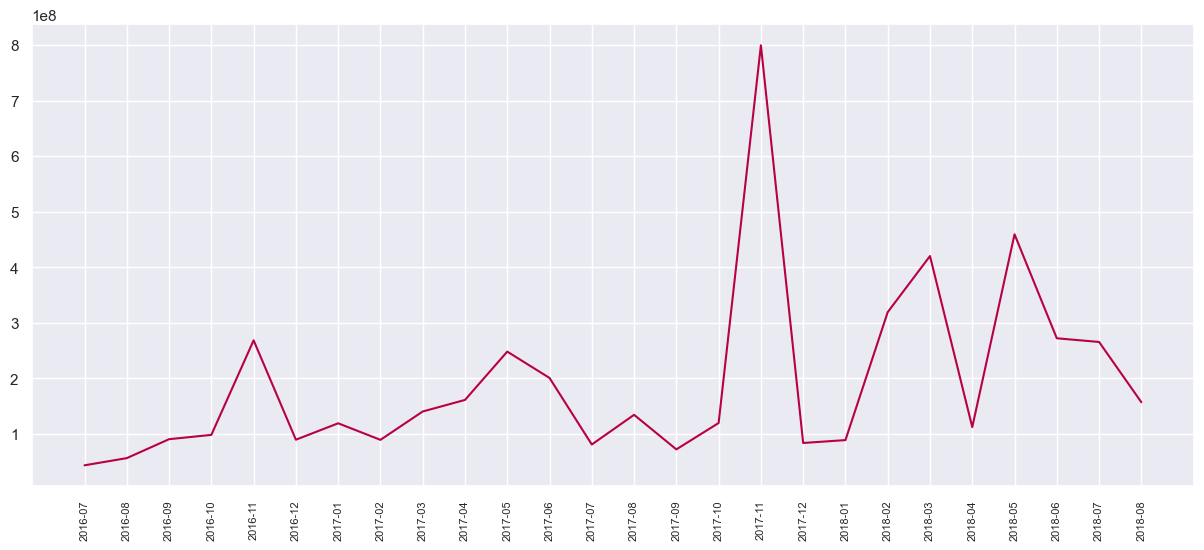

In [72]:
plt.figure(figsize=(15,6))
plt.plot(trend_df['Year_month'],trend_df['grand_total'],color='#b80045')
plt.xticks(rotation='vertical',size=8)
plt.show()

### We observe overall trend from july-2016 to aug-2018 and concluded following points
* #### Purchases increases in last Three months ( October,November and December ) of 2016 and 2017
* #### Most e-commerce buyers purchases products in November
* #### November is most suitable month for sellers to market their products
* #### Overall volume of ecommerce sales is increasing year by year 
* #### For example,you can compare first six months of 2017 with 2018